**CNN**_lecture笔记整理：
---
---
---
---

导论:二维**卷积**神经网络层**基本结构**
---

In [17]:
import torch.nn as nn


class Conv2d(nn.Module):
    """ 二维卷积神经网络层 """
    def __init__(self, kernel_size):
        super().__init__()
        self.weight = nn.Parameter(torch.rand(kernel_size)) #根据大小随机生成的卷积核
        self.bias = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        """ 前向传播方法 """
        return corr2d(x, self.weight) + self.bias

可见前向传播中返回corr2d(x,k)———****卷积操作函数****，
以下是**卷积操作函数**的代码⬇

In [18]:
import torch
import numpy as np

def corr2d(X, Kernal):
    """实现二维互相关运算
param X: 输入张量，形状为 (height_X, width_X)
param K: 卷积核张量，形状为 (height_K, width_K)
return: 输出张量，形状为 (height_X - height_K + 1, width_X - width_K + 1)"""

    h, w = Kernal.shape  # 获取卷积核K的高度和宽度
    Y = torch.zeros((X.shape[0] - h + 1, X.shape[1] - w + 1))
    for i in range(Y.shape[0]):
        for j in range(Y.shape[1]):
            # 从输入张量X中取出与卷积核K大小相同的子区域
            sub_X = X[i:i + h, j:j + w]
            # 将子区域与卷积核K对应元素相乘后求和，得到输出张量Y中位置(i, j)的值
            Y[i, j] = (sub_X * Kernal).sum()
    return Y

**实例化**此模型，导入数据运行

In [19]:
import numpy as np
model1 = Conv2d(kernel_size=(2, 2))
x1 = torch.tensor([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
output1=model1(x1)
print(output1)


tensor([[ 4.6906,  7.1507],
        [12.0709, 14.5310]], grad_fn=<AddBackward0>)


nn.Conv2d 是 PyTorch 框架中系统**自带的**二维卷积层类,如下是参数使用语法

In [20]:
model = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=0)
model

Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))

___

用**线性**神经网络对Fasion-MNIST任务进行**分类识别**
---


导入训练所需数据集

In [21]:
import torchvision
from torchvision import transforms

trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True, transform=trans, download = True)
mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False, transform=trans, download = True)

len(mnist_train), len(mnist_test)

(60000, 10000)

In [22]:
import torch.nn as nn

class LinearClassifier(nn.Module):
    """ 基于线性神经网络的分类模型 """
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(nn.Linear(784, 256),
                                nn.ReLU(),
                                nn.Linear(256, 10))

    def forward(self, x):
        """ 前向传播方法 """
        return self.fc(x)

model = LinearClassifier()

In [23]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(mnist_train, batch_size=256, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=256, shuffle=False)
len(train_dataloader)

235

In [24]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [25]:
loss_func = nn.CrossEntropyLoss()

In [26]:
def train_model(model, train_dataloader, loss_func, optimizer):
    """ 模型训练函数 """
    model.train()
    total_loss = 0.
    for x, y in train_dataloader:
        # x: [batch_size, 1, 28, 28]
        # y: [batch_size]
        y_hat = model(x.view(x.shape[0], -1).to(device))
        loss = loss_func(y_hat, y.to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(train_dataloader)


def test_model(model, test_dataloader, loss_func):
    """ 模型测试函数 """
    model.eval()
    total_loss = 0.
    for x, y in test_dataloader:
        # x: [batch_size, 1, 28, 28]
        # y: [batch_size]
        y_hat = model(x.view(x.shape[0], -1).to(device))
        loss = loss_func(y_hat, y.to(device))

        total_loss += loss.item()
    return total_loss / len(test_dataloader)

In [27]:
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
n_epoch= 50

In [28]:
train_loss_list = []
test_loss_list = []
for i in range(n_epoch):
    train_loss = train_model(model, train_dataloader, loss_func, optimizer)
    test_loss = test_model(model, train_dataloader, loss_func)

    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    print(train_loss)

2.2567722635066256
2.1378272604435047
2.0260196827827617
1.9121774851007665
1.7953996627888782
1.6802991385155537
1.572428368000274
1.4752372021370745
1.3898007032719064
1.3161515038064187
1.252156747148392
1.196826976410886
1.149281165447641
1.1076817192929855
1.0712275378247524
1.0389668941497803
1.0109317705986347
0.9855038267500857
0.962571648333935
0.9419921030389502
0.9231919638654019
0.9060456679222432
0.8903017262195019
0.8762499296918829
0.862791885213649
0.850140088923434
0.8382334795403987
0.8276462032439861
0.8174134251919198
0.8075147288910887
0.7989781088017402
0.7902349669882591
0.7821852288347609
0.7744405482677703
0.767171374280402
0.7599777520971095
0.7529216964194115
0.7468604841130845
0.7404836634372143
0.7346247383888732
0.7289153165005623
0.7232598563458057
0.717672425128044
0.7124157474396077
0.7074202945891847
0.7028587714154669
0.6978731474977858
0.6938407149720699
0.6888243586459059
0.6847205785994834


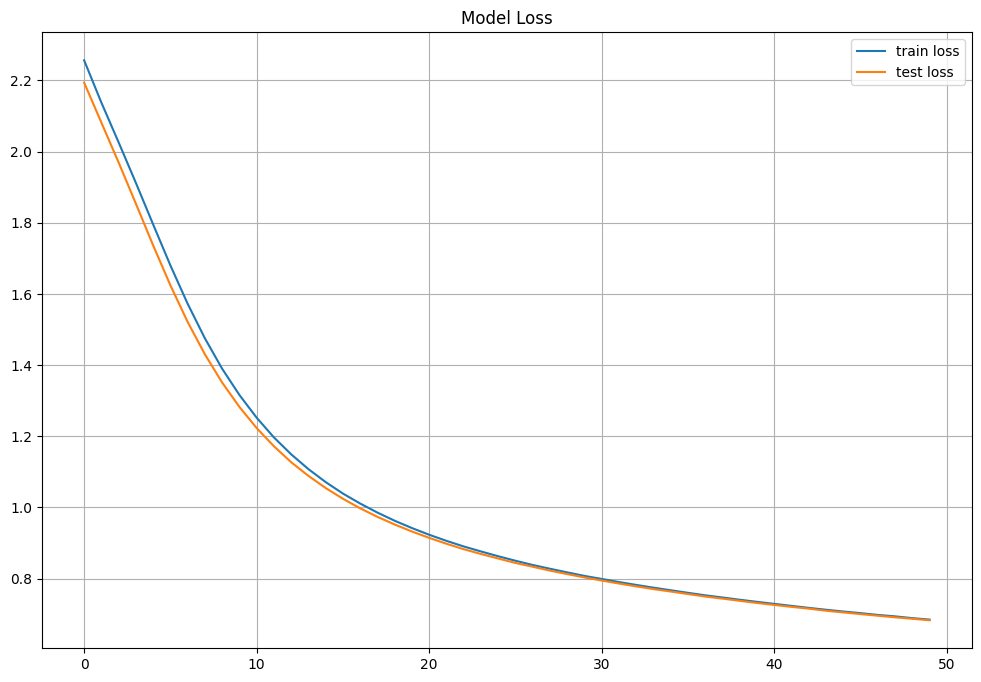

In [29]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

plt.figure(figsize=(12, 8))
plt.plot(train_loss_list, label="train loss")
plt.plot(test_loss_list, label="test loss")
plt.title("Model Loss")
plt.grid()
plt.legend()
plt.show()

用**LeNet**经典卷积神经网络对Fashion - MNIST数据集中的服装图像进行**分类识别**
---

In [30]:
class LeNet(nn.Module):
    """ 二维卷积神经网络分类模型 """
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(nn.Conv2d(1, 6, kernel_size=5, padding=2),
                                  nn.Sigmoid(),
                                  nn.AvgPool2d(kernel_size=2, stride=2),

                                  nn.Conv2d(6, 16, kernel_size=5),
                                  nn.Sigmoid(),
                                  nn.AvgPool2d(kernel_size=2, stride=2))
        self.flatten = nn.Flatten()
        self.fc = nn.Sequential(nn.Linear(16*5*5, 120),
                                nn.Sigmoid(),

                                nn.Linear(120, 84),
                                nn.Sigmoid(),

                                nn.Linear(84, 10))

    def forward(self, x):
        """ 前向传播方法 """
        feat_map = self.conv(x)
        output = self.flatten(feat_map)
        return self.fc(output)

In [31]:
model = LeNet()
model

LeNet(
  (conv): Sequential(
    (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): Sigmoid()
    (2): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (3): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (4): Sigmoid()
    (5): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): Sigmoid()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)

In [32]:
img, label = mnist_train[0]
output = model(img.unsqueeze(0))
print(output)

tensor([[ 0.1813,  0.1245,  0.1591,  0.1797,  0.2100, -0.1589,  0.3281, -0.1339,
          0.2138,  0.5918]], grad_fn=<AddmmBackward0>)


---
---
---

**现代**卷积神经网络  :
-------------

**发展史**
- LeNet `卷积神经网络` (1990.)
- AlexNet `深度卷积神经网络`  (2012.)
- VGG `模块化的卷积神经网络` (2014.)
- ResNet `残差结构的卷积神经网络` (2016.)
- DenseNet `稠密卷积神经网络` (2017.)
- FAST-CNN / FAST-RCNN .....
- YOLOv1 - YOLOv12 (2016. - 2025.)

**AlexNet**模型
---

- `ImageNet 数据集` (3 x 224 x 224)
- 1个11x11的大卷积层，然后跟着5x5中型卷积层，再紧接着连续三个3x3的卷积层
- 激活函数从 Sigmoid 换成了 ReLU
- ![1](https://zh.d2l.ai/_images/alexnet.svg)

AlexNet模型的建构

In [73]:
import torch
import torch.nn as nn

class AlexNet(nn.Module):
    """ AlexNet 深层卷积神经网络 """
    def __init__(self):
        super().__init__()
        # 卷积层
        self.conv = nn.Sequential(nn.Conv2d(1, 96, kernel_size=11, stride=4, padding=1),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=3, stride=2),

                                  nn.Conv2d(96, 256, kernel_size=5, padding=2),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=3, stride=2),

                                  # 使用3个连续的 3x3 卷积层
                                  nn.Conv2d(256, 384, kernel_size=3, padding=1),
                                  nn.ReLU(),
                                  nn.Conv2d(384, 384, kernel_size=3, padding=1),
                                  nn.ReLU(),
                                  nn.Conv2d(384, 256, kernel_size=3, padding=1),
                                  nn.ReLU(),
                                  nn.MaxPool2d(kernel_size=3, stride=2),

                                  nn.Flatten())

        self.fc = nn.Sequential(nn.Linear(5*5*256, 4096),
                                nn.ReLU(),
                                nn.Linear(4096, 4096),
                                nn.ReLU(),
                                nn.Linear(4096, 10))

    def forward(self, x):
        """ 前向传播方法 """
        x_flatten = self.conv(x)
        return self.fc(x_flatten)

开始对数据集进行分类训练  ：

---


In [74]:
import torchvision
import torchvision.transforms as transforms
from torch.utils import data
from torch.utils.data import DataLoader

trans = transforms.Compose([transforms.ToTensor(),
                            transforms.Resize((224, 224))])

mnist_train = torchvision.datasets.FashionMNIST(root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="../data", train=False, transform=trans, download=True)

len(mnist_train), len(mnist_test)
train_dataloader = DataLoader(mnist_train, batch_size=256, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=256, shuffle=False)

len(train_dataloader), len(test_dataloader)

(235, 40)

In [75]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
device

device(type='cpu')

In [76]:
model_AlexNet = AlexNet().to(device)
model_AlexNet

AlexNet(
  (conv): Sequential(
    (0): Conv2d(1, 96, kernel_size=(11, 11), stride=(4, 4), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(96, 256, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(256, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): Conv2d(384, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU()
    (10): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (13): Flatten(start_dim=1, end_dim=-1)
  )
  (fc): Sequential(
    (0): Linear(in_features=6400, out_features=4096, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4096, out_features=4096, bias=True)
    (3): ReLU()
    (4): Linear(in_featu

In [77]:
def count_parameters(model_AlexNet: nn.Module):
    """ 计算模型参数量函数 """
    return sum(p.numel() for p in model_AlexNet.parameters())

count_parameters(model_AlexNet)

46764746

In [78]:
x, y = next(iter(train_dataloader))
x.shape, y.shape

(torch.Size([256, 1, 224, 224]), torch.Size([256]))

In [79]:
def train_model(model_AlexNet, train_dataloader, loss_func, optimizer):
    """ 模型训练函数 """
    model_AlexNet.train()
    total_loss = 0.
    for x, y in train_dataloader:
        # x: [bs, 1, 224, 224]
        # y: [batch_size]
        y_hat = model_AlexNet(x.to(device))
        loss = loss_func(y_hat, y.to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(train_dataloader)

def test_model(model_AlexNet, test_dataloader, loss_func):
    """ 模型测试函数 """
    model_AlexNet.eval()

    y_true = 0
    total_loss = 0.
    for x, y in test_dataloader:
        # x: [bs, 1, 224, 224]
        # y: [batch_size]
        y_hat = model_AlexNet(x.to(device))
        loss = loss_func(y_hat, y.to(device))

        y_true += (y == torch.argmax(y_hat, dim=-1)).sum().item()   #很重要的一步，原理是是布尔值求和，True=1,False=0

        total_loss += loss.item()

    avg_loss = total_loss / len(test_dataloader)
    acc = round(y_true / len(test_dataloader.dataset), 3)  #round是四舍五入函数
    return avg_loss, acc

In [80]:
model_AlexNet = AlexNet().to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_AlexNet.parameters(), lr=1e-3)

In [ ]:
n_epoch = 5

train_loss_list = []
test_loss_list = []
for i in range(n_epoch):
    train_loss = train_model(model_AlexNet, train_dataloader, loss_func, optimizer)
    test_loss, acc = test_model(model_AlexNet, test_dataloader, loss_func)

    train_loss_list.append(train_loss)
    test_loss_list.append(test_loss)
    print(train_loss)

0.6573454809949754
0.33116132179473307
0.2731170620055909


In [ ]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

plt.figure(figsize=(12, 8))
plt.plot(train_loss_list, label="train loss")
plt.plot(test_loss_list, label="test loss")
plt.title("Model Loss")
plt.grid()
plt.legend()
plt.show()

**VGG**  视觉几何组（visual geometry group）
---

- 模块化的卷积神经网络

![VGG网络结构图](https://zh.d2l.ai/_images/vgg.svg)

In [ ]:
def vgg_block(num_conv: int, in_channels: int, out_channels: int) -> nn.Module:
    """ VGG块构建函数 """
    layers = []
    for i in range(num_conv):
        layers.append(nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1))
        layers.append(nn.ReLU())
        in_channels = out_channels
    layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
    return nn.Sequential(*layers)

In [ ]:
def vgg(conv_arch: list) -> nn.Module:
    """ VGG网络构建函数 """
    conv_block = []
    in_channels = 1
    # 卷积部分
    for (num_conv, out_channels) in conv_arch:
        conv_block.append(vgg_block(num_conv, in_channels, out_channels))
        in_channels = out_channels

    # 全连接部分
    model = nn.Sequential(*conv_block,
                          nn.Flatten(),

                          nn.Linear(7*7*out_channels, 4096),
                          nn.ReLU(),
                          nn.Linear(4096, 4096),
                          nn.ReLU(),
                          nn.Linear(4096, 10))
    return model

In [ ]:
conv_arch = [(1, 16), (1, 16), (2, 64), (2, 64), (2, 32)]
vgg(conv_arch).shape
